In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [232]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [233]:
train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


## 1.Data exploration

In [234]:
train.describe(include=['object','integer'])

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
count,1157,1157,1019,1157,1157.000000
unique,1156,1094,1019,1057,NaN
top,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,Shadrach Grentz,2014-11-02T22:48:21,Check out this video on YouTube:﻿,NaN
freq,2,5,1,52,NaN
mean,NaN,NaN,NaN,NaN,0.506482
std,NaN,NaN,NaN,NaN,0.500174
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [235]:
test.describe(include=['object','integer'])

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
count,799.000000,799,799,692,799
unique,NaN,799,760,692,733
top,NaN,z13cfr5o3mnyez4ju04ce3whmvflg1fifl00k,Laura Brown,2015-05-22T22:19:43.707000,Check out this video on YouTube:﻿
freq,NaN,1,3,1,45
mean,399.000000,NaN,NaN,NaN,NaN
std,230.795725,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,199.500000,NaN,NaN,NaN,NaN
50%,399.000000,NaN,NaN,NaN,NaN
75%,598.500000,NaN,NaN,NaN,NaN


Text(0.5,1,'Missing Values')

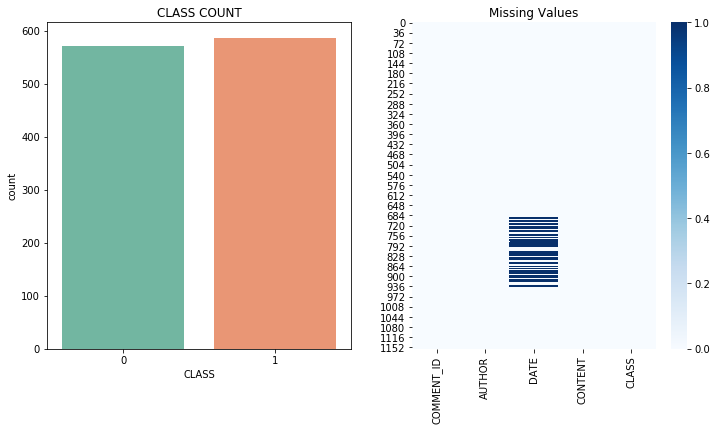

In [236]:
fig,ax= plt.subplots(1,2,figsize=(12,6))
sns.countplot(train.CLASS, palette='Set2', ax=ax[0])
ax[0].set_title('CLASS COUNT')
sns.heatmap(train.isnull(),cmap='Blues',ax=ax[1])
ax[1].set_title('Missing Values')

From above exploration we can say Class is balanced therefore we don't have to worry about imbalanced problem. Other than this Dataset contains missing values. Some Dates are missing from dataset.

Therefore Either we have to fill or drop missing columns/rows 

# Due to short timeline of competition i used tableau for better Data exploration

### Feature engineering

In [237]:
def extract(data):
    words=re.compile(r'(check out|check this|dollar|[=+]|sub|channel|adf|instagram|share|follow|https://|[$]|please|money|free|www|facebook|fb|support|like this comment)',re.IGNORECASE)
    data['spam_word']=data.CONTENT.str.extract(words)
    data.spam_word.fillna(0,inplace=True)
    return data

In [238]:
def feature(data):
    data['MULTI_COMMENT'] = data['AUTHOR'] #to initialise multi_comments
    z=0
    for i in range(len(data)):
        for j in range(1,len(data)):
            if(data.iloc[i,1] == data.iloc[j,1]):
                z=z+1
        if(z>1):
            data.ix[i,'MULTI_COMMENT']=1
        else:
            data.ix[i,'MULTI_COMMENT']=0
        z=0
    return data

### Missing data

In [217]:
trainset=extract(train)
trainset=feature(trainset)
trainset.dropna(inplace=True)

C:\Users\Rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [218]:
testset=extract(test)
testset=feature(testset)
testset.fillna(0,inplace=True)

C:\Users\Rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


## Datetime index

In [219]:
def datetime(data):
    data=data.set_index('DATE')
    data.index=pd.to_datetime(data.index)
    data['year_2013']=data.index.year==2013
    data['year_2014']=data.index.year==2014
    data['year_2015']=data.index.year==2015
    data['mon_1']=data.index.month==1
    data['mon_2']=data.index.month==2
    data['mon_3']=data.index.month==3
    data['mon_4']=data.index.month==4
    data['mon_5']=data.index.month==5
    data['mon_6']=data.index.month==6
    data['mon_7']=data.index.month==7
    data['mon_8']=data.index.month==8
    data['mon_9']=data.index.month==9
    data['mon_10']=data.index.month==10
    data['mon_11']=data.index.month==11
    data['mon_12']=data.index.month==12
    return(data)

In [220]:
trainset=datetime(trainset)
trainset_label=trainset['CLASS']
del trainset['CLASS']

testset=datetime(testset)

# Cleaning

In [221]:
def cleaner(data):
    del data['CONTENT']
    del data['COMMENT_ID']
    del data['AUTHOR']
    x=data.columns
    for i in range(0,1):
        data[x[i]]=data[x[i]].astype('category')
    x=data.columns
    for i in range(1,17):
        data[x[i]]=np.where(data[x[i]]==True,1,0)
    return data

In [222]:
trainset=cleaner(trainset)
del testset['ID']
testset= cleaner(testset)

In [223]:
trainset.head(2)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,
2013-11-07 06:20:48,check out,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-09 08:28:43,channel,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [224]:
testset.head(2)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,check out,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-08 17:34:21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [225]:
trainset=pd.get_dummies(trainset,drop_first=True)
testset=pd.get_dummies(testset,drop_first=True)

In [226]:
trainset.shape

(1019, 65)

In [227]:
testset.shape

(799, 50)

In [229]:
trainset.columns

Index(['MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015', 'mon_1',
       'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8', 'mon_9',
       'mon_10', 'mon_11', 'mon_12', 'spam_word_$', 'spam_word_+',
       'spam_word_=', 'spam_word_CHANNEL', 'spam_word_CHECK OUT',
       'spam_word_CHeck out', 'spam_word_Channel', 'spam_word_Check Out',
       'spam_word_Check out', 'spam_word_Check this', 'spam_word_Dollar',
       'spam_word_FACEBOOK', 'spam_word_FB', 'spam_word_FOLLOW',
       'spam_word_FREE', 'spam_word_Facebook', 'spam_word_Follow',
       'spam_word_Free', 'spam_word_LIKE THIS COMMENT',
       'spam_word_Like this comment', 'spam_word_MONEY', 'spam_word_Money',
       'spam_word_PLEASE', 'spam_word_Please', 'spam_word_SHARE',
       'spam_word_SUB', 'spam_word_SUPPORT', 'spam_word_Share',
       'spam_word_Sub', 'spam_word_Support', 'spam_word_Www', 'spam_word_adf',
       'spam_word_channel', 'spam_word_check out', 'spam_word_check this',
       'spam_word_do

In [230]:
testset.columns

Index(['MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015', 'mon_1',
       'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8', 'mon_9',
       'mon_10', 'mon_11', 'mon_12', 'spam_word_+', 'spam_word_=',
       'spam_word_CHANNEL', 'spam_word_CHECK OUT', 'spam_word_Channel',
       'spam_word_Check Out', 'spam_word_Check out', 'spam_word_FREe',
       'spam_word_Facebook', 'spam_word_Follow', 'spam_word_Free',
       'spam_word_Like This Comment', 'spam_word_Like this comment',
       'spam_word_MONEY', 'spam_word_Money', 'spam_word_PLEASE',
       'spam_word_Please', 'spam_word_SUB', 'spam_word_Sub', 'spam_word_adf',
       'spam_word_channel', 'spam_word_check out', 'spam_word_fb',
       'spam_word_follow', 'spam_word_free', 'spam_word_https://',
       'spam_word_like This Comment', 'spam_word_like this comment',
       'spam_word_money', 'spam_word_please', 'spam_word_share',
       'spam_word_sub', 'spam_word_support', 'spam_word_www'],
      dtype='object')

In [54]:
#df
#names=names_backup

trainset=df
for x in names:
    print(x)
    del trainset['AUTHOR_'+x]

In [55]:
trainset.shape

(1019, 59)

In [56]:
from sklearn.decomposition import PCA
pca= PCA(n_components=10, whiten= False, random_state=187236)
pca.fit_transform(trainset)

array([[-0.44173338,  0.47678762,  1.14604956, ...,  0.04503715,
         0.13597001, -0.0597606 ],
       [-0.45098009,  0.42119788,  1.14980463, ..., -0.03192938,
         0.14714405, -0.12643826],
       [-0.43761286,  0.43392008,  1.12814962, ..., -0.02675328,
         0.21411495, -0.07718814],
       ...,
       [-0.16102126,  1.02793875,  0.56615389, ...,  0.68387095,
        -0.33062228,  0.29889583],
       [-0.16102126,  1.02793875,  0.56615389, ...,  0.68387095,
        -0.33062228,  0.29889583],
       [-0.16102126,  1.02793875,  0.56615389, ...,  0.68387095,
        -0.33062228,  0.29889583]])

In [57]:
sum(pca.explained_variance_ratio_)

0.8214531779087227

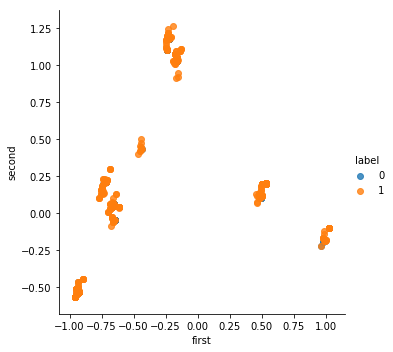

In [58]:
pca_df=pd.DataFrame(pca.fit_transform(trainset),index=trainset.index)
pca_df=pca_df.iloc[:,0:2]
pca_df=pd.concat([pca_df,trainset_label],axis=1)
pca_df.columns=['first','second','label']
sns.lmplot(x='first',y='second', hue='label',data=pca_df, fit_reg=False)

## Part3: Predictive Modeling

### Splittting data into test and train set

In [59]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(trainset, trainset_label, test_size=0.30,
                                             stratify=trainset_label,random_state=765534)

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [62]:
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [63]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

### SGD

Accuracy is :  0.9354264475743348


Text(0.5,1,'F1 Score = 0.8835341365461847')

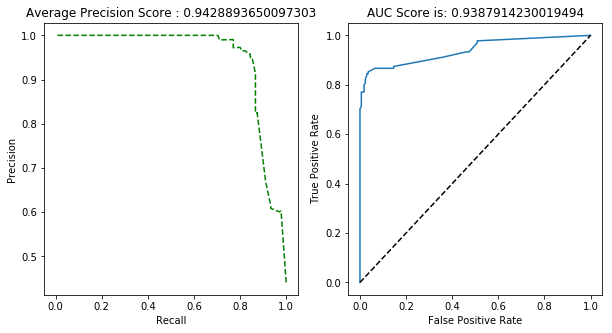

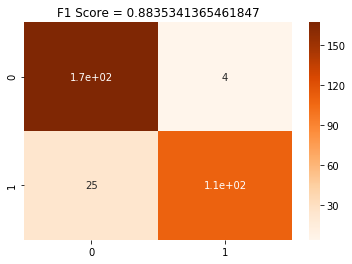

In [64]:
sgd=SGDClassifier(tol=0.00001, random_state=87643,loss='log')
score_sgd=CrossVal(Xtrain,Ytrain,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(Xtrain,Ytrain)
plotting(Ytest,sgd.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,sgd.predict(Xtest)), annot= True, cmap='Oranges')
sgd_f1=f1_score(Ytest,sgd.predict(Xtest))
plt.title('F1 Score = {}'.format(sgd_f1))

### b) K-Nearest Neighbors

Accuracy is :  0.7658646322378717


Text(0.5,1,'F1 Score = 0.6467661691542289')

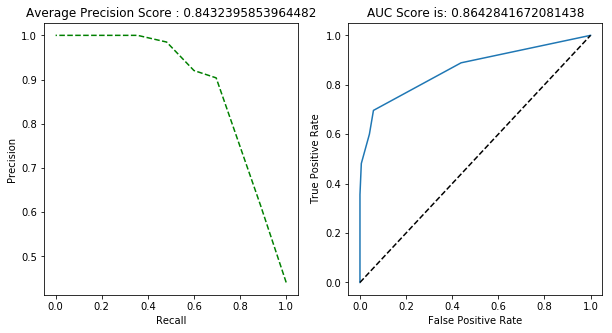

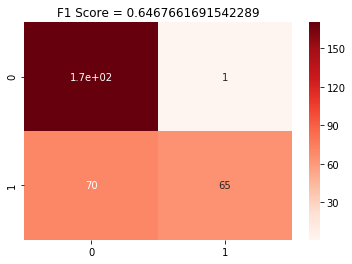

In [65]:
k=KNeighborsClassifier(algorithm='auto', n_neighbors= 7)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

# Logistic

Accuracy is :  0.9088223787167449


C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Text(0.5,1,'F1 Score = 0.8734693877551021')

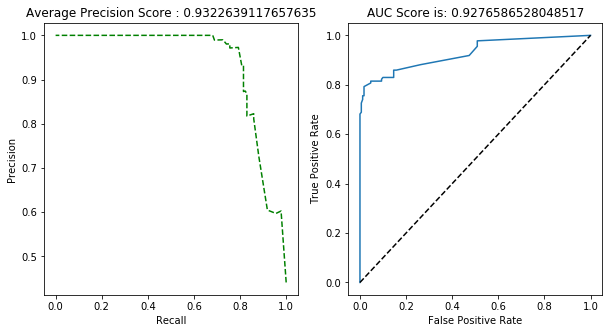

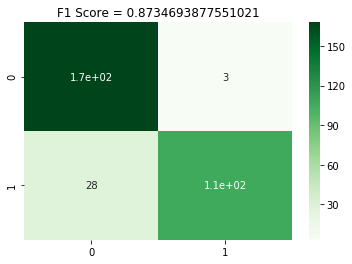

In [66]:
lr=LogisticRegression(class_weight='balanced', tol=0.00001)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

## decision tree

Accuracy is :  0.9073356807511737


Text(0.5,1,'F1 Score = 0.8138528138528138')

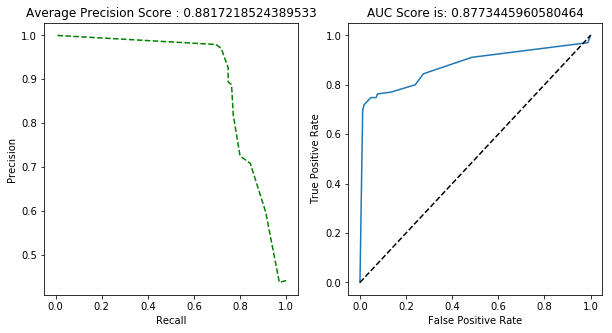

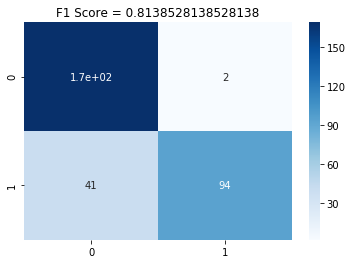

In [67]:
dtc=DecisionTreeClassifier()
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
plotting(Ytest,dtc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,dtc.predict(Xtest)), annot= True, cmap='Blues')

dtc_f1=f1_score(Ytest,dtc.predict(Xtest))
plt.title('F1 Score = {}'.format(dtc_f1))

### e) Support vector machine

Accuracy is :  0.9466940532081377


Text(0.5,1,'F1 Score = 0.918918918918919')

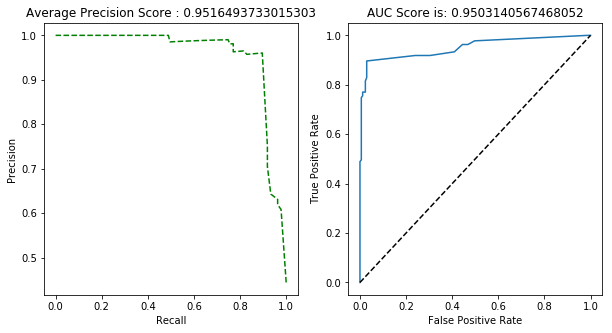

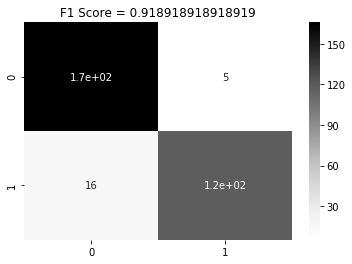

In [95]:
svc=SVC(C=13,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(Xtrain,Ytrain,svc)
print("Accuracy is : ",score_svc)
svc.fit(Xtrain,Ytrain)
plotting(Ytest,svc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,svc.predict(Xtest)), annot= True, cmap='Greys')
svc_f1=f1_score(Ytest,svc.predict(Xtest))
plt.title('F1 Score = {}'.format(svc_f1))

### f) Random Forest Classifier

Accuracy is: 0.9101330203442878


Text(0.5,1,'F1 Score = 0.8189655172413793')

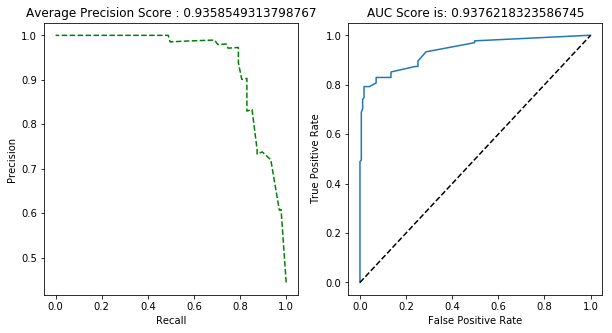

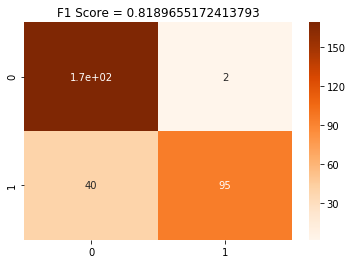

In [70]:
rf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1296)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

### g) Extra Trees Classifier

Accuracy is: 0.9115610328638498


Text(0.5,1,'F1 Score = 0.8225108225108225')

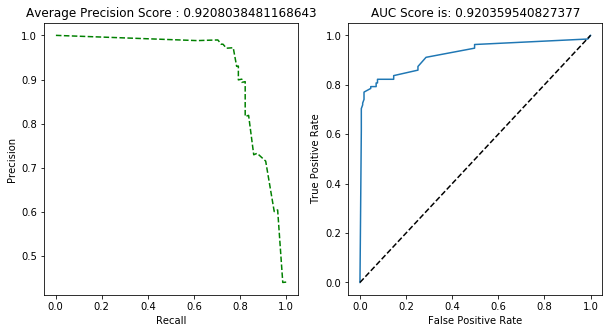

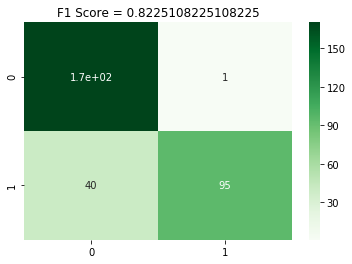

In [75]:
etc=ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=728964)
score_etc= CrossVal(Xtrain,Ytrain,etc)
print('Accuracy is:',score_etc)
etc.fit(Xtrain,Ytrain)
plotting(Ytest,etc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,etc.predict(Xtest)), annot= True, cmap='Greens')

etc_f1=f1_score(Ytest,etc.predict(Xtest))
plt.title('F1 Score = {}'.format(etc_f1))

### h) Ada Boost Classifier

Accuracy is: 0.876564945226917


Text(0.5,1,'F1 Score = 0.8032128514056226')

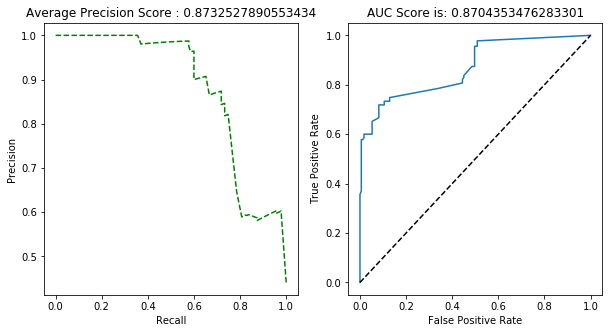

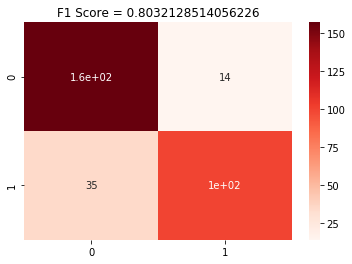

In [72]:
abc=AdaBoostClassifier(sgd,n_estimators=100, random_state=2786,algorithm='SAMME', learning_rate=0.01)
score_ada= CrossVal(Xtrain,Ytrain,abc)
print('Accuracy is:',score_ada)
abc.fit(Xtrain,Ytrain)
plotting(Ytest,abc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,abc.predict(Xtest)), annot= True, cmap='Reds')

abc_f1=f1_score(Ytest,abc.predict(Xtest))
plt.title('F1 Score = {}'.format(abc_f1))

### i) Gradient Boosting Classifier 

Accuracy is: 0.7854264475743349


Text(0.5,1,'F1 Score = 0.6875')

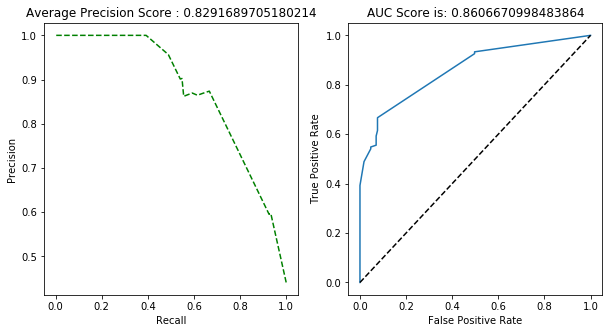

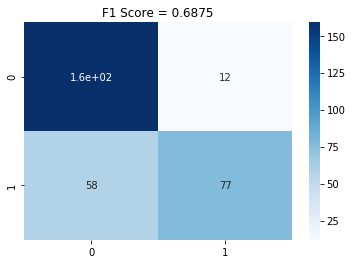

In [73]:
gbc=GradientBoostingClassifier(n_estimators=100, random_state=977078, learning_rate = 0.01)
score_gbc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(Xtrain,Ytrain)
plotting(Ytest,gbc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,gbc.predict(Xtest)), annot= True, cmap='Blues')

gbc_f1=f1_score(Ytest,gbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

### j) Bagging Classifier 

Accuracy is: 0.7854264475743349


Text(0.5,1,'F1 Score = 0.7353951890034366')

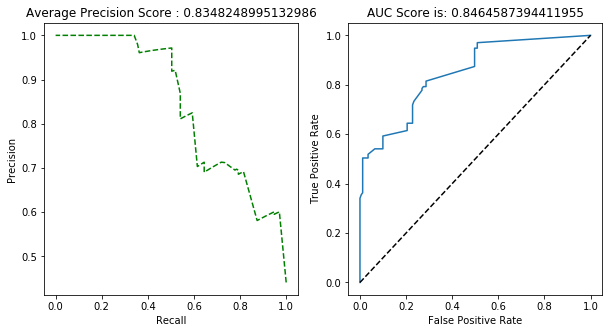

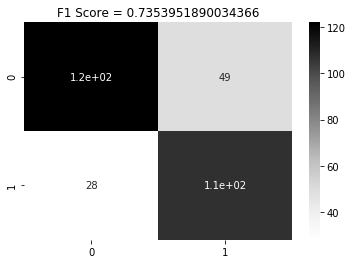

In [74]:
bc=BaggingClassifier(lr,max_samples=31, bootstrap=True, n_jobs= -1, )
score_bc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_bc)
bc.fit(Xtrain,Ytrain)
plotting(Ytest,bc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,bc.predict(Xtest)), annot= True, cmap='Greys')

bc_f1=f1_score(Ytest,bc.predict(Xtest))
plt.title('F1 Score = {}'.format(bc_f1))

In [76]:
import lightgbm as lgb

In [77]:
param = { 'objective': 'binary',
        'metric':'auc',
        'bagging_fraction': 0.42640981419916935,
  'feature_fraction': 0.5718888549869281,
  'lambda_l1': 1.9766800773416946,
  'lambda_l2': 1.3322262742031845,
  'max_depth': 5,
  'min_data_in_leaf': 24,
  'min_gain_to_split': 0.5219501719417943,
  'num_leaves': 25}

In [78]:
data_1=lgb.Dataset(Xtrain,Ytrain)
best=lgb.cv(param, train_set=data_1, nfold=10, metrics='auc',
       num_boost_round=10000, early_stopping_rounds=1000)

In [79]:
best

{'auc-mean': [0.680102066532258,
  0.7996862399193548,
  0.8061668346774195,
  0.8116406249999999,
  0.806265120967742,
  0.8273689516129032,
  0.8258618951612903,
  0.8245715725806452,
  0.8244102822580646,
  0.8268976814516129,
  0.8300176411290323,
  0.8317918346774194,
  0.8311340725806451,
  0.8314931955645161,
  0.8325441028225807,
  0.8322215221774194,
  0.832546622983871,
  0.8311756552419356,
  0.8342237903225806,
  0.8342137096774195,
  0.8343724798387097,
  0.8343724798387097,
  0.8347757056451612,
  0.8359148185483871,
  0.8330115927419355,
  0.8303843245967742,
  0.8312487399193549,
  0.8325088205645162,
  0.8325088205645162,
  0.835905997983871,
  0.8387084173387096,
  0.8375189012096774,
  0.8384576612903226,
  0.8389314516129032,
  0.8428881048387098,
  0.8449647177419356,
  0.8451260080645163,
  0.851796875,
  0.8518775201612904,
  0.8519682459677419,
  0.8541759072580646,
  0.8531779233870967,
  0.8553553427419356,
  0.8548311491935484,
  0.8548311491935484,
  0.85514

### Voting Classifier

C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy is: 0.9214006259780906


Text(0.5,1,'F1 Score = 0.8816326530612246')

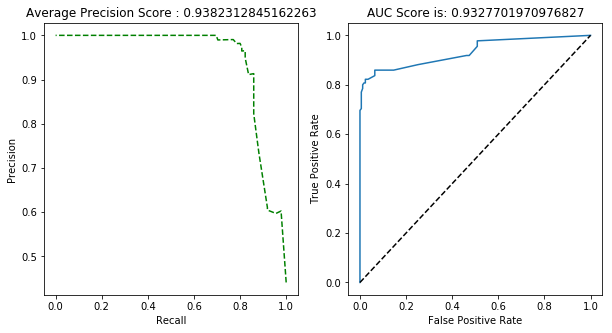

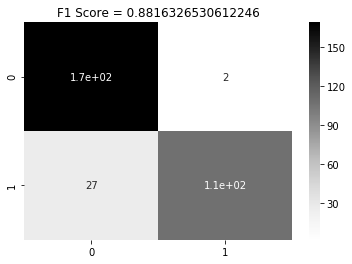

In [89]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(voting='soft', estimators=[('bg',bc),('lr',lr),('sgd',sgd)])
score_vc= CrossVal(Xtrain,Ytrain,vc)
print('Accuracy is:',score_vc)
vc.fit(Xtrain,Ytrain)
plotting(Ytest,vc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,vc.predict(Xtest)), annot= True, cmap='Greys')

vc_f1=f1_score(Ytest,vc.predict(Xtest))
plt.title('F1 Score = {}'.format(vc_f1))

In [100]:
pd.DataFrame(rf.feature_importances_,index=Xtrain.columns).sort_values(ascending=False, by=0)

,0
spam_word_Check out,0.146962
mon_5,0.143684
spam_word_sub,0.068137
spam_word_https://,0.051291
spam_word_Please,0.041035
spam_word_Sub,0.036042
year_2015,0.032888
spam_word_please,0.032038
mon_8,0.028711
spam_word_channel,0.028617


In [103]:
train.groupby('AUTHOR')['CLASS'].sum()

AUTHOR
   Berty  Winata                          0
((A.B))                                   1
16ladydanger                              1
2010shevy                                 1
2666playboy                               1
42o2 Studios                              1
500 Subscribers with no videos?           1
5000palo                                  0
8-BitMusic                                1
AUSENCIO garrido                          1
Aaa Aaa                                   1
Aarjav Parmar                             0
Abdullah Fawzi                            1
Abhi Vats                                 0
Ach raf                                   1
Adam Whitney                              2
Adele Lupei                               0
Adrian Skalak                             1
Adyel Rodriguez                           1
Aemon Sevker                              1
Agung Handono Susilo                      0
Ahmed Medhat                              0
Aiden Hill               

# Grid search

from sklearn.model_selection import GridSearchCV

param = [{'max_depth': [3,5,7,9], 'min_samples_split':[9,13,17,25,31],'min_samples_leaf':[3,5,9,11,15],
          'criterion':['gini','entropy'], 'max_leaf_nodes':[7,9,11,13,17]}]

from sklearn.metrics import make_scorer
def custom_auc(ground_truth, predictions):
    fpr, tpr, thres= roc_curve(ground_truth, predictions)    
    return auc(fpr,tpr)
my_auc = make_scorer(custom_auc, greater_is_better=True, needs_proba=True)

gs=GridSearchCV(param_grid=param, cv=3, scoring=my_auc, 
                      estimator=RandomForestClassifier(n_estimators=100))
gs.fit(Xtrain,Ytrain)

gs.best_estimator_, gs.best_score_

# Test

In [403]:
testset=extract(test)
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 6 columns):
ID            799 non-null int64
COMMENT_ID    799 non-null object
AUTHOR        799 non-null object
DATE          799 non-null object
CONTENT       799 non-null object
spam_word     799 non-null object
dtypes: int64(1), object(5)
memory usage: 37.5+ KB


In [404]:
testset.fillna(0,inplace=True)

In [405]:
testset1=datetime(testset)

In [406]:
testset1.head()

,ID,COMMENT_ID,AUTHOR,CONTENT,spam_word,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,Hey guys check out my new channel and our firs...,check out,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2013-11-08 17:34:21,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,just for test I have to say murdev.com,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2013-11-26 02:55:11,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,"Hey, check out my new website!! This site is a...",check out,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2013-11-28 12:33:27,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,i turned it on mute as soon is i came on i jus...,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2013-11-28 16:01:47,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,You should check my channel for Funny VIDEOS!!﻿,channel,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [407]:
del testset1['ID']
testset2=cleaner(testset1)

In [408]:
testset2.head()

,AUTHOR,spam_word,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,adam riyati,check out,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-08 17:34:21,Evgeny Murashkin,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-26 02:55:11,Jason Haddad,check out,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-28 12:33:27,Bob Kanowski,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-28 16:01:47,Cony,channel,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [409]:
testset2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 2013-11-07 12:37:15 to 2013-07-12 22:33:27.916000
Data columns (total 17 columns):
AUTHOR       799 non-null category
spam_word    799 non-null category
year_2013    799 non-null int32
year_2014    799 non-null int32
year_2015    799 non-null int32
mon_1        799 non-null int32
mon_2        799 non-null int32
mon_3        799 non-null int32
mon_4        799 non-null int32
mon_5        799 non-null int32
mon_6        799 non-null int32
mon_7        799 non-null int32
mon_8        799 non-null int32
mon_9        799 non-null int32
mon_10       799 non-null int32
mon_11       799 non-null int32
mon_12       799 non-null int32
dtypes: category(2), int32(15)
memory usage: 82.9 KB


In [410]:
testset2=pd.get_dummies(testset2,drop_first=True)

In [411]:
testset2.shape

(799, 807)

In [413]:
vc.predict(testset2)

ValueError: Number of features of the model must match the input. Model n_features is 1040 and input n_features is 807.